In [3]:
#загружаем необходимые модули

import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.word2vec import LineSentence
from multiprocessing import cpu_count
import gensim.downloader as api

In [5]:
#класс для преобразования строк в формат, пригодный для обучения модели

class MySentences2(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for i in open(os.path.join(self.dirname), encoding = 'utf-8'):
            yield i.split()

In [6]:
# открываем спискок текстов в строковом формате через итератор, который считывает их из файла

sentences = MySentences2('D:\МОЯ ПАПКА\УЧЕБА\ВКР\corpus_ver2\lemm_texts.txt') 

In [30]:
#обучаем и сохраняем модель

model = Word2Vec(sentences, size=1000, window=3, min_count=10)
print(model)
model.save('letters_model.model')

Word2Vec(vocab=4723, size=1000, alpha=0.025)


In [32]:
#тестируем модель (при указании в кавычках слова, семантически выводятся наиболее близкие)

model.most_similar('смерть')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('кровь', 0.8324794769287109),
 ('отомстить', 0.8137805461883545),
 ('мстить', 0.8099159002304077),
 ('пасть', 0.795684814453125),
 ('советский', 0.7928850650787354),
 ('герой', 0.770174503326416),
 ('борьба', 0.769006609916687),
 ('слза', 0.7660521268844604),
 ('высокий', 0.7645888328552246),
 ('храбрый', 0.7619342803955078)]

In [36]:
#сохраняем словарь модели и координаты векторов в переменные для визуализации

words = model.wv.vocab

X = model[model.wv.vocab]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

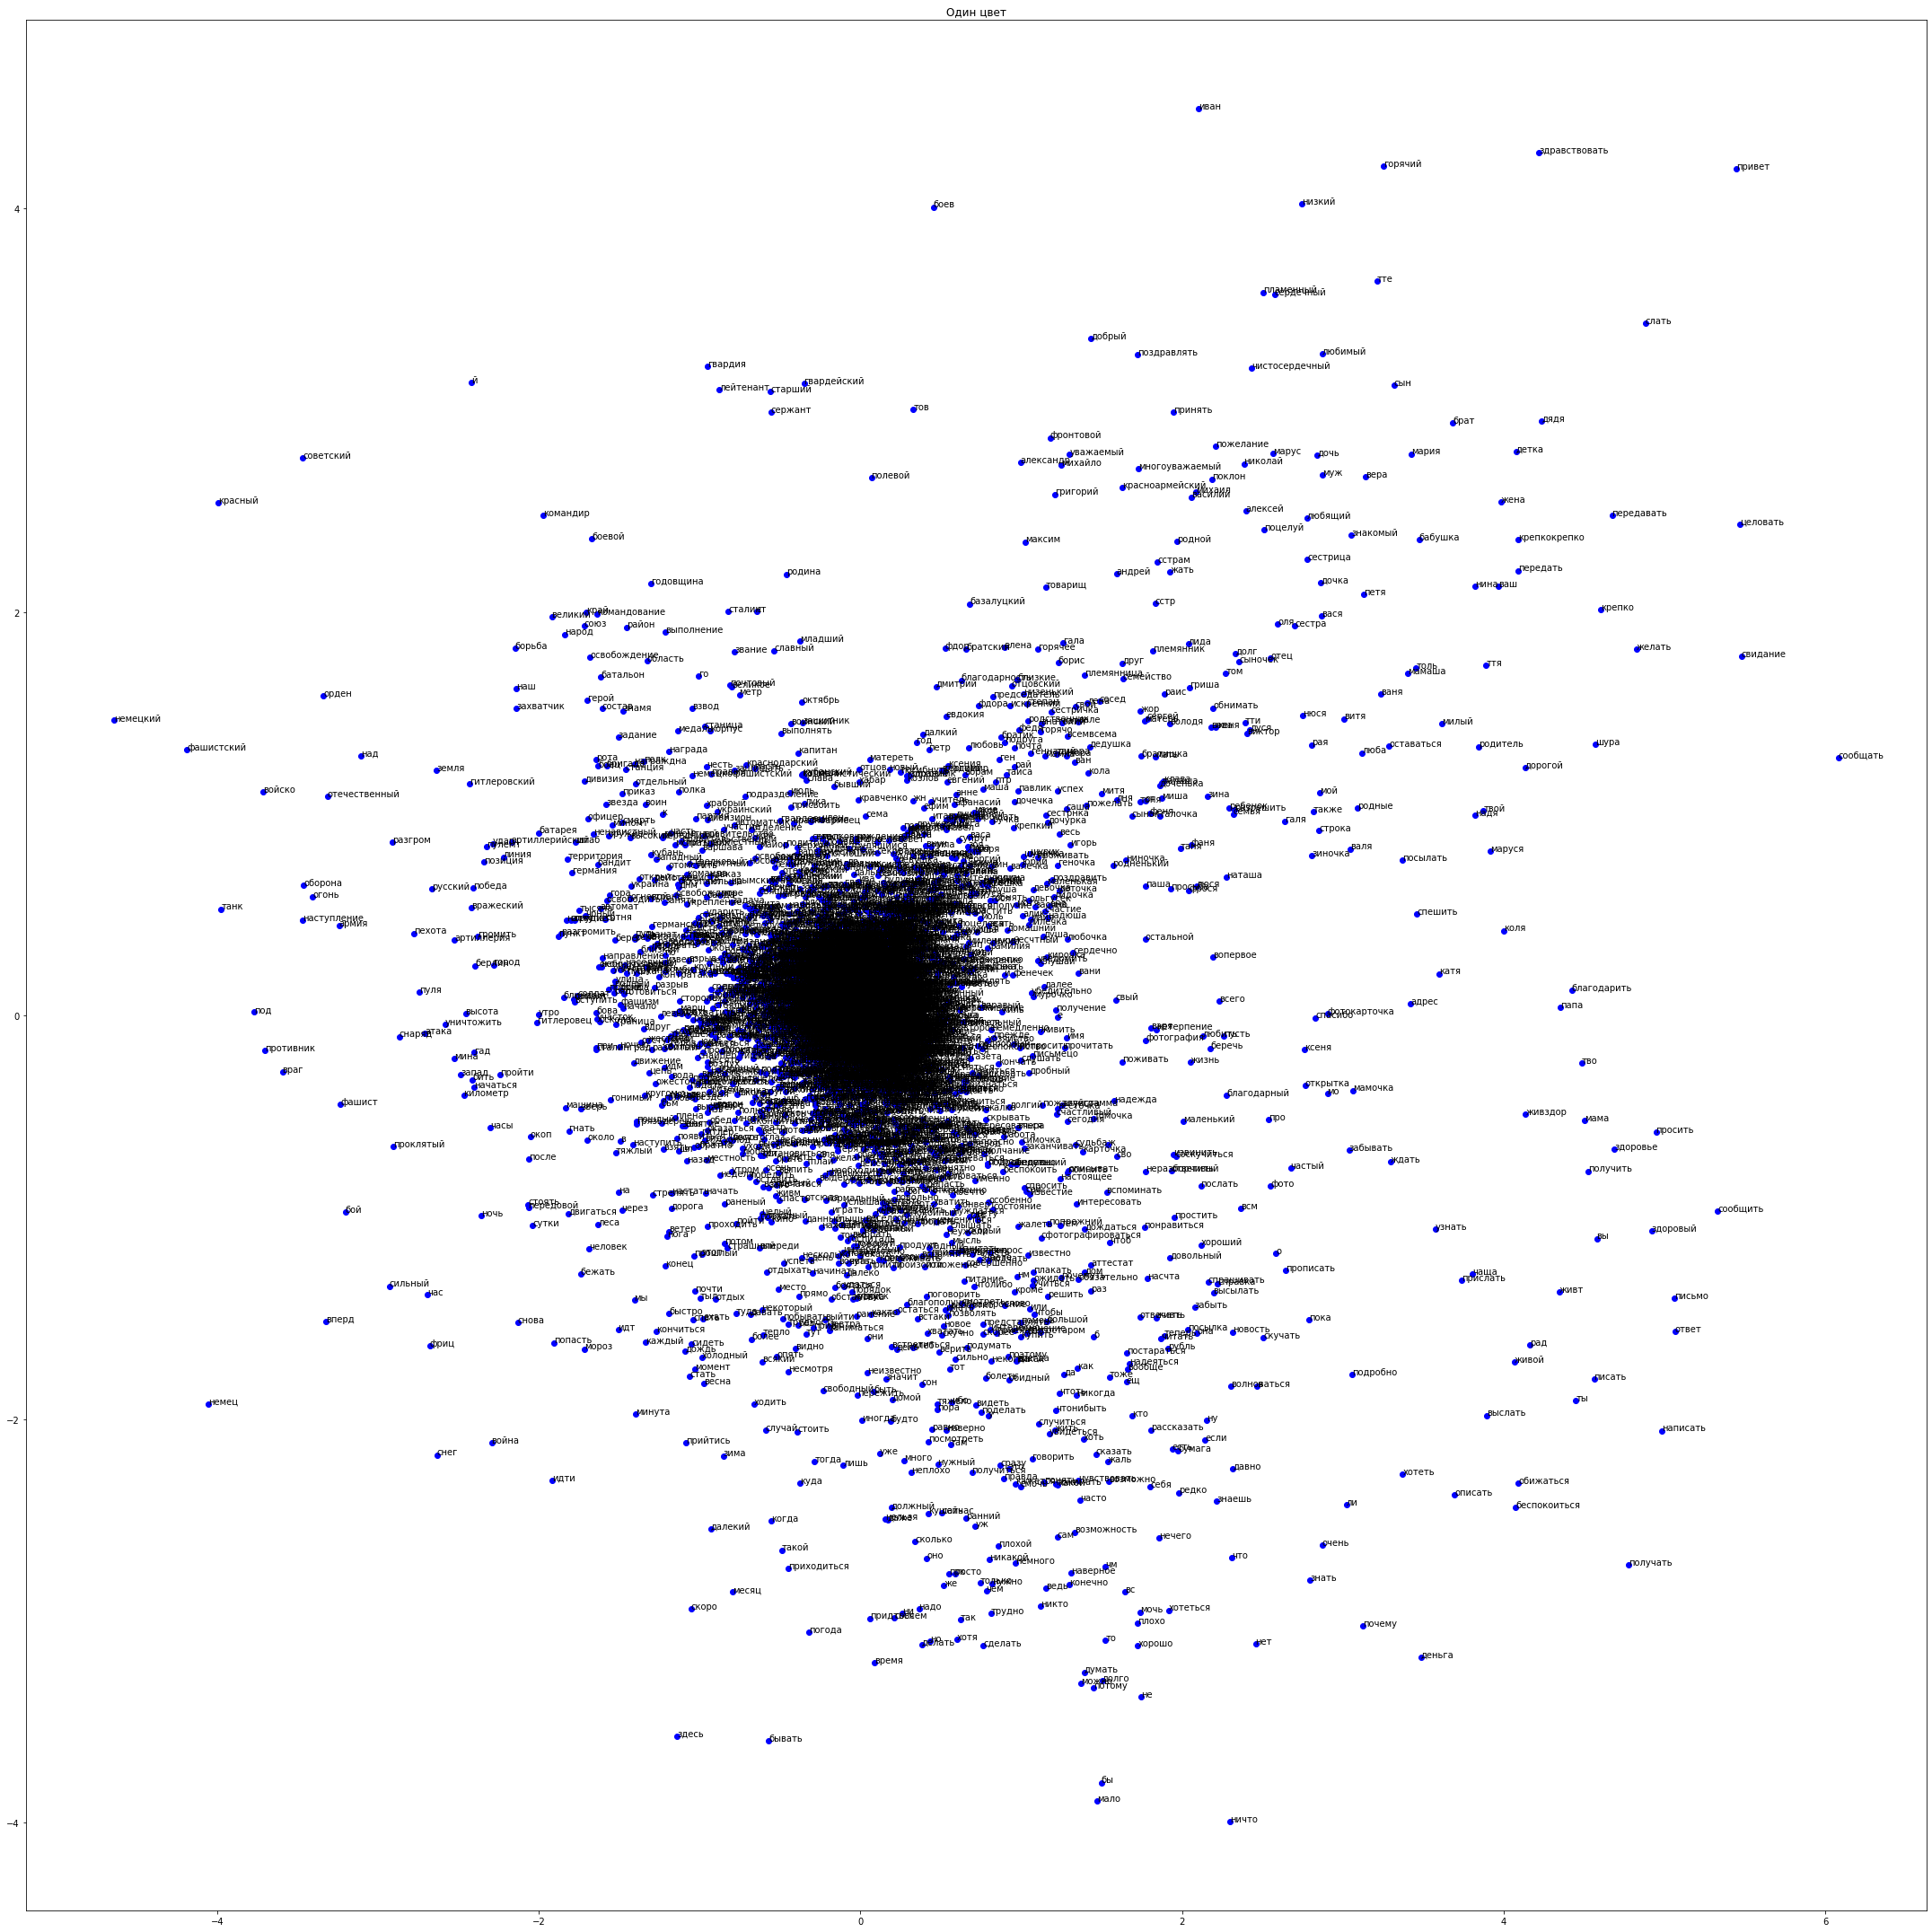

In [39]:
import matplotlib.pyplot as plt
#plt.scatter(result[:, 0], result[:, 1])

x = result[:, 0]

y = result[:, 1]

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'blue')    #  цвет точек

ax.set_facecolor('white')     #  цвет области Axes
ax.set_title('Один цвет')     #  заголовок для Axes

fig.set_figwidth(30)     #  ширина и
fig.set_figheight(30)    #  высота "Figure"

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.tight_layout() 
plt.savefig('letters_W2V.png', dpi = 400)
plt.show()